In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# читаем данные
df = pd.read_csv('data/success_rate.csv')
# приводим столбец  к типу datetime
df['Time'] = pd.to_datetime(df['Time'])
# добавляем столбец с днями недели
df['dow'] = df['Time'].dt.day_name()
# индексируем df по временному вектору
df.index = df['Time']

In [3]:
# определяем границу аномалий по тройному стандартному отклонению от среднего
data = df['Rate'].to_list()
data_std = np.std(data)
data_mean = np.mean(data)
anomaly_cut_off = data_std * 3
# сохраняем границы отклонения
lower_limit  = data_mean - anomaly_cut_off
upper_limit = data_mean + anomaly_cut_off

In [4]:
# подготавливаем функцию возвращающую размер отклонения
def anomaly_check(rate):
    if rate > upper_limit:
        return rate - upper_limit
    elif rate < lower_limit:
        return lower_limit - rate
    else:
        return 0

In [5]:
# определяем размер отклонения
df['anomaly'] = df['Rate'].apply(anomaly_check)
# показываем аномальные значения
df[df['anomaly']!=0]

,Time,Rate,dow,anomaly
Time,,,,
2020-11-19 09:00:00,2020-11-19 09:00:00,66,Thursday,16.346545
2020-11-21 06:00:00,2020-11-21 06:00:00,78,Saturday,4.346545
2020-11-21 09:00:00,2020-11-21 09:00:00,61,Saturday,21.346545
2020-12-03 15:00:00,2020-12-03 15:00:00,62,Thursday,20.346545
2020-12-06 12:00:00,2020-12-06 12:00:00,80,Sunday,2.346545


### Выводы
Объем данных не дает полного представления о происходящем, но можно предположить следующее:
 - объем пользовательских сессий, в которых отсутствовали ошибки сокращался в четверг, субботу и воскресенье. Необходимо выяснить причину падения показателя, сравнить тотальные кол-ва сессий по дням недели.
 - Если в четверг, субботу и воскресенье будет наблюдаться рост кол-ва соединений, необходимо искать ответ в прикладной части, почему пользователи посещают ресурс именно в эти дни.
 - Если гипотеза о увеличившемся кол-ве подключений, и как следствие увеличении сессий с ошибками, не подтвердится, можно заглянуть в логи и метрики оборудования за периоды аномалий и выяснить причину возникновения ошибок

Ниже представлено распределение по дням недели и времени.

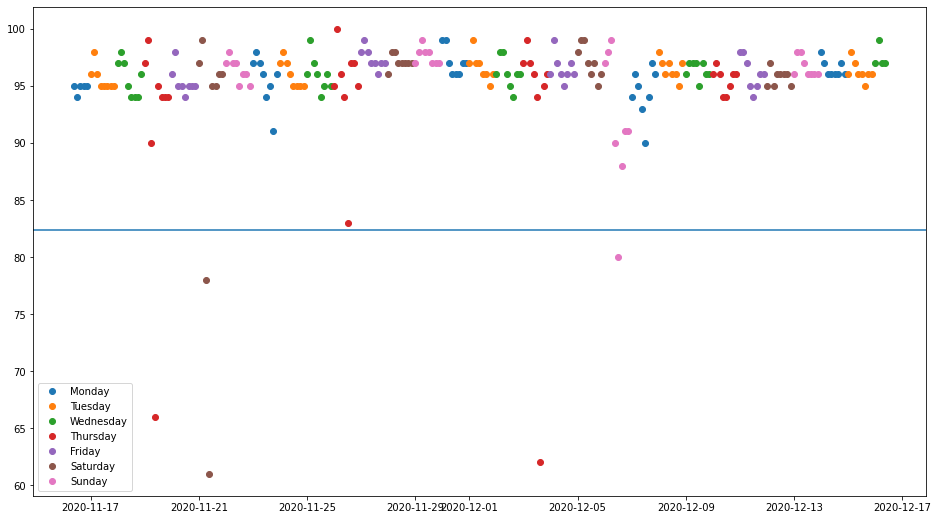

In [6]:
fig = plt.figure(figsize=(16, 9))
for i in df['dow'].unique():
    x, y = df[df['dow']==i].index,df[df['dow']==i]['Rate']
    label = i
    plt.plot(x,y, 'o', label=label)
plt.axhline(y=lower_limit)
if upper_limit<100:
    plt.axhline(y=upper_limit)
plt.legend()
plt.show()

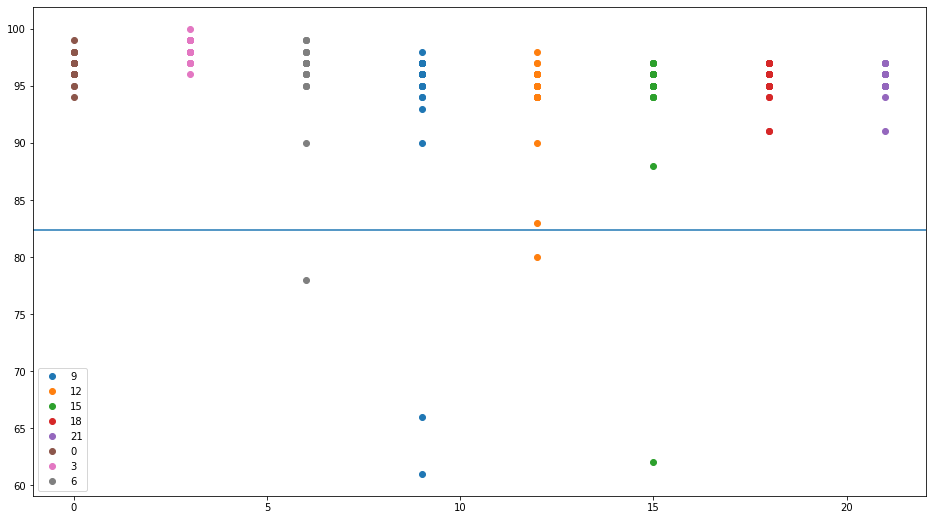

In [7]:
fig = plt.figure(figsize=(16, 9))
for i in df.index.hour.unique():
    x, y = df[df.index.hour==i].index.hour,df[df.index.hour==i]['Rate']
    label = i
    plt.plot(x,y, 'o', label=label)
plt.axhline(y=lower_limit)
if upper_limit<100:
    plt.axhline(y=upper_limit)
plt.legend()
plt.show()